In [ ]:
import numpy as np
import pandas as pd

In [ ]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [ ]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [ ]:
loan_data_inputs_train.shape

(373028, 324)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
loan_data_inputs_test.shape

(93257, 324)

In [ ]:
loan_data_targets_test.shape

(93257, 1)

My processed dataset has both dummies as well as reference columns. So for PD model I have to remove the reference columns

In [ ]:
lst_cat = pd.read_csv('List of Categories.csv')
#Reading the csv: list of categories
cat_lst = lst_cat.iloc[:,0].tolist()
#Converting the dataframe to a list
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: ,cat_lst]
#Only select columns of dummy variables

In [ ]:
lst_ref = pd.read_csv('Reference Categories.csv')
ref_lst = lst_ref.iloc[:,0].tolist()

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_lst, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories.
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


Logistic Regression model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(inputs_train, loan_data_targets_train)

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
reg.intercept_

array([-1.33110033])

In [ ]:
reg.coef_

array([[ 1.16008588,  0.90605059,  0.70886039,  0.51906067,  0.33683742,
         0.14489978,  0.09080023,  0.10678409,  0.02966993,  0.0552502 ,
         0.05660928,  0.05940581,  0.07497421,  0.13244703,  0.09936455,
         0.18112665,  0.2249629 ,  0.2203493 ,  0.25915686,  0.31662656,
         0.51750841,  0.08806786, -0.01075401,  0.30676978,  0.2025115 ,
         0.21415482,  0.26666793,  0.05443059,  0.07807787,  0.10017768,
         0.1253007 ,  0.08959918,  0.06084498,  0.12334573,  1.07505717,
         0.87435371,  0.77403265,  0.57294223,  0.41066048,  0.16587621,
        -0.06981087,  0.8505668 ,  0.5383496 ,  0.28958857,  0.10065063,
         0.05613176,  0.03783793,  0.0795651 ,  0.11955873,  0.12625758,
         0.07428006,  0.03130486,  0.63477458,  0.49137981,  0.282013  ,
        -0.01101435, -0.10865451, -0.1343336 , -0.14973945, -0.15435139,
        -0.11932467, -0.20970968,  0.12264508,  0.17843345, -0.02093652,
         0.02532919,  0.21758349,  0.03470324,  0.0

In [ ]:
feature_name = inputs_train.columns.values

In [ ]:
# Dataframe having the column names against the coefficients
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.331100
1,grade:A,1.160086
2,grade:B,0.906051
3,grade:C,0.708860
4,grade:D,0.519061
...,...,...
100,mths_since_last_record:3-20,0.435610
101,mths_since_last_record:21-31,0.364481
102,mths_since_last_record:32-80,0.527067
103,mths_since_last_record:81-86,0.201852


Logistic Regression Model with P-values

In [ ]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature name,Coefficients
0,Intercept,-1.331100
1,grade:A,1.160086
2,grade:B,0.906051
3,grade:C,0.708860
4,grade:D,0.519061
...,...,...
100,mths_since_last_record:3-20,0.435610
101,mths_since_last_record:21-31,0.364481
102,mths_since_last_record:32-80,0.527067
103,mths_since_last_record:81-86,0.201852


In [ ]:
p_values = reg.p_values

In [ ]:
p_values = np.append(np.nan, np.array(p_values))

In [ ]:
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.331100,NaN
1,grade:A,1.160086,1.708063e-37
2,grade:B,0.906051,1.040571e-49
3,grade:C,0.708860,6.551899e-36
4,grade:D,0.519061,4.997560e-22
...,...,...,...
100,mths_since_last_record:3-20,0.435610,6.075661e-04
101,mths_since_last_record:21-31,0.364481,1.780753e-03
102,mths_since_last_record:32-80,0.527067,5.046704e-09
103,mths_since_last_record:81-86,0.201852,5.754549e-02


Droping insignificant variables

In [ ]:
lst_cat = pd.read_csv('List of Sig Categories.csv')
cat_lst = lst_cat.iloc[:,0].tolist()
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: ,cat_lst]
inputs_train_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
206088,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
36159,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
365838,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
131932,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
146867,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
lst_ref = pd.read_csv('Sig Ref Categories.csv')
ref_lst = lst_ref.iloc[:,0].tolist()
inputs_train = inputs_train_with_ref_cat.drop(ref_lst, axis = 1)
inputs_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
365838,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
131932,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
146867,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.374036
1,grade:A,1.123662
2,grade:B,0.878918
3,grade:C,0.684796
4,grade:D,0.496923
...,...,...
80,mths_since_last_record:3-20,0.440625
81,mths_since_last_record:21-31,0.350710
82,mths_since_last_record:32-80,0.502956
83,mths_since_last_record:81-86,0.175839


In [ ]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.374036,NaN
1,grade:A,1.123662,3.228237e-35
2,grade:B,0.878918,4.278551e-47
3,grade:C,0.684796,6.712386e-34
4,grade:D,0.496923,1.347044e-20
...,...,...,...
80,mths_since_last_record:3-20,0.440625,3.347130e-04
81,mths_since_last_record:21-31,0.350710,1.832454e-03
82,mths_since_last_record:32-80,0.502956,3.964444e-09
83,mths_since_last_record:81-86,0.175839,8.604680e-02


In [ ]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,cat_lst]
inputs_test_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
296284,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
91763,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
inputs_test = inputs_test_with_ref_cat.drop(ref_lst, axis = 1)
inputs_test

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
296284,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
61777,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
91763,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


Estimating PD

In [ ]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.07569437, 0.92430563],
       [0.15076123, 0.84923877],
       [0.11465081, 0.88534919],
       ...,
       [0.02678659, 0.97321341],
       [0.04020859, 0.95979141],
       [0.04763349, 0.95236651]])

In [ ]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.92430563, 0.84923877, 0.88534919, ..., 0.97321341, 0.95979141,
       0.95236651])

In [ ]:
loan_data_targets_test_temp = loan_data_targets_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [ ]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_targets_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924306
288564,1,0.849239
213591,1,0.885349
263083,1,0.940636
165001,1,0.968665


Confusion Matrix

In [ ]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924306,1
288564,1,0.849239,0
213591,1,0.885349,0
263083,1,0.940636,1
165001,1,0.968665,1
...,...,...,...
115,1,0.880174,0
296284,1,0.966433,1
61777,0,0.973213,1
91763,1,0.959791,1


In [ ]:
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,7374,2816
1,35813,47254


In [ ]:
confusion_matrix_per = confusion_matrix / df_actual_predicted_probs.shape[0]
confusion_matrix_per

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384025,0.506707


In [ ]:
true_neg = confusion_matrix_per.iloc[0,0]
true_pos = confusion_matrix_per.iloc[1,1]
true_rate = true_neg + true_pos
true_rate

0.5857790836076648

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
log_roc = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                    df_actual_predicted_probs['y_hat_test_proba'])
log_roc

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262869, 0.99262869, 0.99069779, ..., 0.4879087 , 0.39373676,
        0.37528319]))

In [ ]:
fpr,tpr,thresholds = log_roc

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

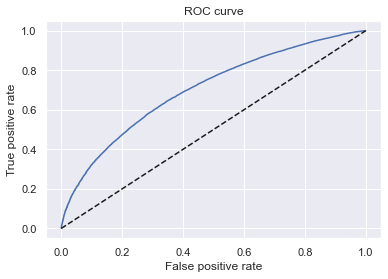

In [ ]:
plt.plot(fpr,tpr)
plt.plot(tpr,tpr, linestyle = '--', color ='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.702208104993648

Risk Scorecard

In [ ]:
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.374036,NaN
1,grade:A,1.123662,3.228237e-35
2,grade:B,0.878918,4.278551e-47
3,grade:C,0.684796,6.712386e-34
4,grade:D,0.496923,1.347044e-20
...,...,...,...
80,mths_since_last_record:3-20,0.440625,3.347130e-04
81,mths_since_last_record:21-31,0.350710,1.832454e-03
82,mths_since_last_record:32-80,0.502956,3.964444e-09
83,mths_since_last_record:81-86,0.175839,8.604680e-02


In [ ]:
ref_lst

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [ ]:
df_ref_cat = pd.DataFrame(columns = ['Feature name'], data = ref_lst)
df_ref_cat['Coefficients'] = 0
df_ref_cat['P Values'] = np.nan
df_ref_cat

,Feature name,Coefficients,P Values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_cat])
df_scorecard = df_scorecard.reset_index()
df_scorecard.drop(['index'], axis= 1, inplace = True)
df_scorecard

,Feature name,Coefficients,P Values
0,Intercept,-1.374036,NaN
1,grade:A,1.123662,3.228237e-35
2,grade:B,0.878918,4.278551e-47
3,grade:C,0.684796,6.712386e-34
4,grade:D,0.496923,1.347044e-20
...,...,...,...
97,acc_now_delinq:0,0.000000,NaN
98,annual_inc:<20K,0.000000,NaN
99,dti:>35,0.000000,NaN
100,mths_since_last_delinq:0-3,0.000000,NaN


In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,P Values,Original feature name
0,Intercept,-1.374036,NaN,Intercept
1,grade:A,1.123662,3.228237e-35,grade
2,grade:B,0.878918,4.278551e-47,grade
3,grade:C,0.684796,6.712386e-34,grade
4,grade:D,0.496923,1.347044e-20,grade
...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
98,annual_inc:<20K,0.000000,NaN,annual_inc
99,dti:>35,0.000000,NaN,dti
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


Grouping in terms of reference categroy and calculating the SUM

In [ ]:
df_scorecard_group_min = df_scorecard.groupby('Original feature name')['Coefficients'].min()
df_scorecard_group_max = df_scorecard.groupby('Original feature name')['Coefficients'].max()

In [ ]:
df_scorecard_group_min

Original feature name
Intercept                     -1.374036
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081518
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071788
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011185
Name: Coefficients, dtype: float64

In [ ]:
df_scorecard_group_max

Original feature name
Intercept                     -1.374036
acc_now_delinq                 0.180365
addr_state                     0.521965
annual_inc                     0.552377
dti                            0.384450
emp_length                     0.125853
grade                          1.123662
home_ownership                 0.106249
initial_list_status            0.053827
inq_last_6mths                 0.666267
int_rate                       0.883147
mths_since_earliest_cr_line    0.129361
mths_since_issue_d             1.084206
mths_since_last_delinq         0.183094
mths_since_last_record         0.502956
purpose                        0.301856
term                           0.078943
verification_status            0.085719
Name: Coefficients, dtype: float64

In [ ]:
min_sum_coef = df_scorecard_group_min.sum()
min_sum_coef

-1.5385271799584626

In [ ]:
max_sum_coef = df_scorecard_group_max.sum()
max_sum_coef

5.590260910298645

In [ ]:
min_score = 300
max_score = 850

In [ ]:
df_scorecard

,Feature name,Coefficients,P Values,Original feature name
0,Intercept,-1.374036,NaN,Intercept
1,grade:A,1.123662,3.228237e-35,grade
2,grade:B,0.878918,4.278551e-47,grade
3,grade:C,0.684796,6.712386e-34,grade
4,grade:D,0.496923,1.347044e-20,grade
...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
98,annual_inc:<20K,0.000000,NaN,annual_inc
99,dti:>35,0.000000,NaN,dti
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients']*(max_score - min_score)/(max_sum_coef - min_sum_coef)
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,-1.374036,NaN,Intercept,-106.009580
1,grade:A,1.123662,3.228237e-35,grade,86.692717
2,grade:B,0.878918,4.278551e-47,grade,67.810287
3,grade:C,0.684796,6.712386e-34,grade,52.833390
4,grade:D,0.496923,1.347044e-20,grade,38.338564
...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [ ]:
#Calculate the intercept
df_scorecard['Score - Calculation'][0] = (max_score - min_score)/(max_sum_coef - min_sum_coef) * (df_scorecard['Coefficients'][0] - min_sum_coef) + min_score
df_scorecard

<ipython-input-77-c2693a138a16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = \


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,-1.374036,NaN,Intercept,312.690813
1,grade:A,1.123662,3.228237e-35,grade,86.692717
2,grade:B,0.878918,4.278551e-47,grade,67.810287
3,grade:C,0.684796,6.712386e-34,grade,52.833390
4,grade:D,0.496923,1.347044e-20,grade,38.338564
...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,-1.374036,NaN,Intercept,312.690813,313.0
1,grade:A,1.123662,3.228237e-35,grade,86.692717,87.0
2,grade:B,0.878918,4.278551e-47,grade,67.810287,68.0
3,grade:C,0.684796,6.712386e-34,grade,52.833390,53.0
4,grade:D,0.496923,1.347044e-20,grade,38.338564,38.0
...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
99,dti:>35,0.000000,NaN,dti,0.000000,0.0
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel


851.0

In [ ]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
pd.options.display.max_rows = 30
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,Intercept,-1.374036,NaN,Intercept,312.690813,313.0,0.309187
1,grade:A,1.123662,3.228237e-35,grade,86.692717,87.0,0.307283
2,grade:B,0.878918,4.278551e-47,grade,67.810287,68.0,0.189713
3,grade:C,0.684796,6.712386e-34,grade,52.833390,53.0,0.166610
4,grade:D,0.496923,1.347044e-20,grade,38.338564,38.0,-0.338564
...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000


In [ ]:
ind = list(df_scorecard.index)
max_difference = []
for i in ind:
    ori_name = df_scorecard['Original feature name'][i]
    this_score = df_scorecard['Score - Preliminary'][i]
    max_score_t = df_scorecard.loc[df_scorecard['Original feature name']
                               == ori_name]['Score - Preliminary'].max()
    this_diff = df_scorecard['Difference'][i]

    if this_score == max_score_t:
        max_difference.append(this_diff)
    else:
        max_difference.append(0)

In [ ]:
df_scorecard['Max_Difference'] = max_difference
df_scorecard['Max_Difference'][0] = 0
df_scorecard

<ipython-input-83-af39ea40863c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Max_Difference'][0] = 0


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference
0,Intercept,-1.374036,NaN,Intercept,312.690813,313.0,0.309187,0.000000
1,grade:A,1.123662,3.228237e-35,grade,86.692717,87.0,0.307283,0.307283
2,grade:B,0.878918,4.278551e-47,grade,67.810287,68.0,0.189713,0.000000
3,grade:C,0.684796,6.712386e-34,grade,52.833390,53.0,0.166610,0.000000
4,grade:D,0.496923,1.347044e-20,grade,38.338564,38.0,-0.338564,0.000000
...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.000000


In [ ]:
max_diff_ind = df_scorecard['Max_Difference'].idxmax()
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][max_diff_ind] = df_scorecard['Score - Final'][max_diff_ind] - 1

<ipython-input-84-23964fa0d0f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][max_diff_ind] = \


In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

Credit scores

In [ ]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference,Score - Final
0,Intercept,-1.374036,NaN,Intercept,312.690813,313.0,0.309187,0.000000,313.0
1,grade:A,1.123662,3.228237e-35,grade,86.692717,87.0,0.307283,0.307283,87.0
2,grade:B,0.878918,4.278551e-47,grade,67.810287,68.0,0.189713,0.000000,68.0
3,grade:C,0.684796,6.712386e-34,grade,52.833390,53.0,0.166610,0.000000,53.0
4,grade:D,0.496923,1.347044e-20,grade,38.338564,38.0,-0.338564,0.000000,38.0
...,...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.000000,0.0
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.000000,0.0
99,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.000000,0.0
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.000000,0.0


In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
296284,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
91763,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Make the column order match the row orde of the scorecard df
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
296284,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
61777,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
91763,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores.shape

(102,)

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(scorecard_scores.shape[0],1)
scorecard_scores.shape

(102, 1)

In [ ]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores

,0
362514,614.0
288564,553.0
213591,577.0
263083,633.0
165001,683.0
...,...
115,573.0
296284,679.0
61777,696.0
91763,664.0
